In [10]:
import keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

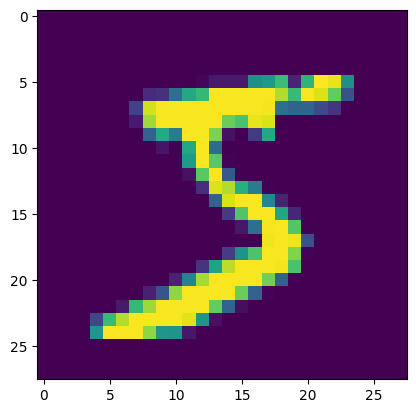

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [12]:
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

X_train.shape

(60000, 784)

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

def classification_model():
    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [21]:
model = classification_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9450 - loss: 0.1822 - val_accuracy: 0.9696 - val_loss: 0.0953
Epoch 2/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9755 - loss: 0.0797 - val_accuracy: 0.9718 - val_loss: 0.0870
Epoch 3/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9830 - loss: 0.0538 - val_accuracy: 0.9783 - val_loss: 0.0677
Epoch 4/10
1875/1875 - 16s - 9ms/step - accuracy: 0.9867 - loss: 0.0408 - val_accuracy: 0.9804 - val_loss: 0.0678
Epoch 5/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9900 - loss: 0.0315 - val_accuracy: 0.9720 - val_loss: 0.1288
Epoch 6/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9918 - loss: 0.0257 - val_accuracy: 0.9813 - val_loss: 0.0682
Epoch 7/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9930 - loss: 0.0210 - val_accuracy: 0.9804 - val_loss: 0.0774
Epoch 8/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9937 - loss: 0.0192 - val_accuracy: 0.9808 - val_loss: 0.0755
Epoch 9/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9942 - loss: 0.0183 - val_accu

In [22]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.980400025844574% 
 Error: 0.019599974155426025


In [23]:
print(scores)

[0.09306243807077408, 0.980400025844574]


In [24]:
model.save('classification_model.keras')

In [ ]:
pretrained_model = keras.saving.load_model('classification_model.keras')